<a href="https://colab.research.google.com/github/patil1306sanjana/Tic_Tac_Toe_game/blob/main/Predicting_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
data.shape

(10000, 3)

In [13]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


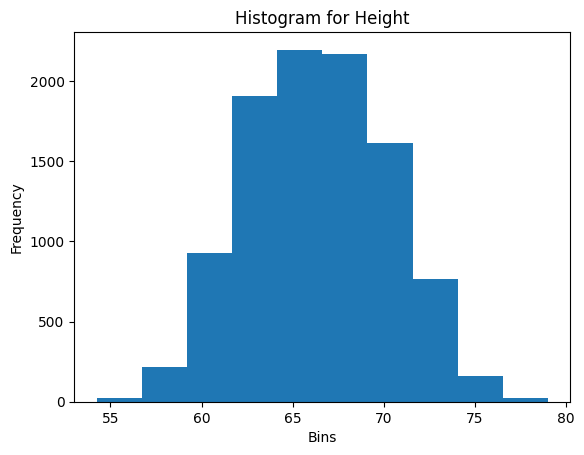

In [14]:
height = data['Height']
plt.hist(height, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for Height')
plt.show()

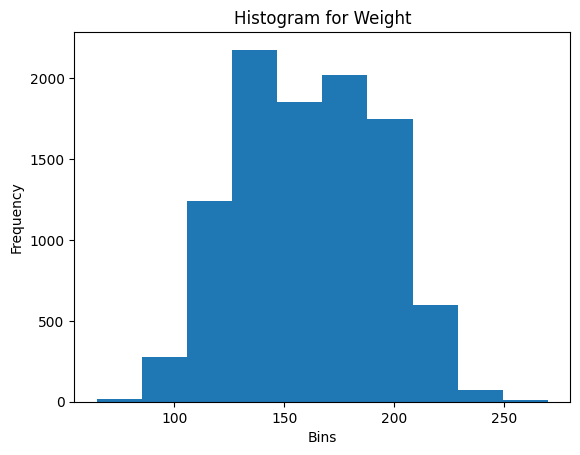

In [15]:
weight = data['Weight']
plt.hist(weight, bins = 10)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram for Weight')
plt.show()

In [16]:
X = data.iloc[:, 1:3].values
y = data.iloc[:,0:1].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)

In [25]:
X_test

array([[ 64.72387669, 138.0857961 ],
       [ 67.27217066, 187.36336585],
       [ 74.52097209, 216.53319128],
       ...,
       [ 68.395164  , 169.63439905],
       [ 65.18093656, 169.45963091],
       [ 60.72107966, 123.62835958]])

In [18]:
prediction= clf.predict(X_test)
prediction

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
      dtype=object)

In [19]:
Accuracy = accuracy_score(y_test, prediction)
Accuracy

0.9184

In [20]:
#confusion matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[1140,   97],
       [ 107, 1156]])

In [21]:
#classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Female       0.91      0.92      0.92      1237
        Male       0.92      0.92      0.92      1263

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



In [26]:
#predicting the model
height = 64.72387669
weight = 138.0857961
prediction = clf.predict([[height, weight]])
print("The classifier predicts that you could be " +str(prediction[0]))

The classifier predicts that you could be Female
